# Question 2 - Tezpur University Android Malware Dataset

## Task A: Dataset Curation and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\Samantha\anaconda_work\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Samantha\anaconda_work\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Import data 

malware = pd.read_csv('../data/raw/TUANDROMD.csv')
malware.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [3]:
# Drop rows with NaN in any column
malware = malware.dropna()

In [4]:
malware.isna().any().any()

False

In [5]:
malware[malware.isna().any(axis=1)]

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label


### 1. Describe and implement preprocessing steps specific to this problem, including strategies for handling imbalanced classes, encoding categorical variables, and any data transformation techniques applied

In [6]:
malware.select_dtypes(exclude = ['number']).columns

Index(['Label'], dtype='object')

In [7]:
malware['Label'] = malware['Label'].replace({'malware': 1, 'goodware': 0}).astype('int')

C:\Users\Samantha\AppData\Local\Temp\ipykernel_1964\1615791745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  malware['Label'] = malware['Label'].replace({'malware': 1, 'goodware': 0}).astype('int')


Since the dataset is preprocessed with all binary features and no missing values to begin with, we explore any class imbalances and ensure any categorical variables are encoded. 

In [8]:
# Check the distribution of each target 
target_distribution = malware['Label'].value_counts()
print("Class distribution (sum of each class):\n", target_distribution)

# Check the distribution percentage of each class
label_distribution_percentage = malware['Label'].value_counts(normalize=True) * 100

# Check the result
print("Class distribution percentage:\n", label_distribution_percentage)

Class distribution (sum of each class):
 Label
1    3565
0     899
Name: count, dtype: int64
Class distribution percentage:
 Label
1    79.861111
0    20.138889
Name: proportion, dtype: float64


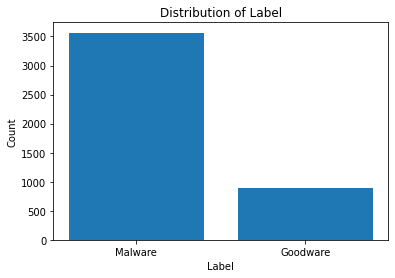

In [9]:
# Plot
plt.bar(target_distribution.index.astype(str), target_distribution.values)  # Ensure x-ticks are strings
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')
plt.xticks([0, 1], ['Malware', 'Goodware'])
plt.show()

The distribution shows that this is a highly imbalanced dataset with the minority class being goodware which only makes up only a small percentage of the total dataset. Therefore, we implement SMOTE to create artificial minority instances. 

In [10]:
# separate the features and target 
X = malware.drop(columns=['Label'])  # Features
y = malware['Label']  # Target columns (goodware and malware)

# verify the shapes of X and y
print(X.shape)
print(y.shape)

(4464, 241)
(4464,)


In [11]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
 Label
1    3565
0    3565
Name: count, dtype: int64


In [12]:
# Convert the resampled data back into a DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Label')], axis=1)

In [17]:
# Export to csv
resampled_data.to_csv('../data/preprocessed/malware_preprocessed_v2.csv', index=False)

### 2. Conduct exploratory data analysis (EDA) to uncover insights related to class distributions, feature correlations, and potential predictors of interest (Tip: consider applying PCA). Summarize key findings that could influence model selection and tuning.

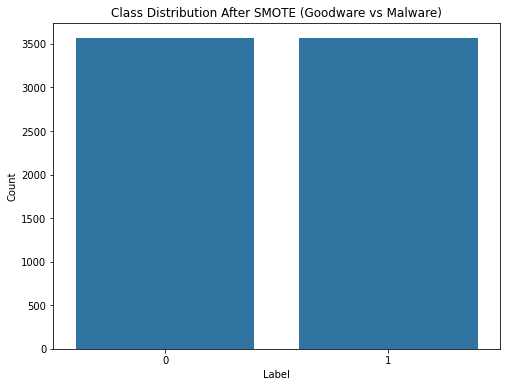

In [13]:
# Plot the distribution of the target classes after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE (Goodware vs Malware)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Dataset has balances goodware and malware values - successfully addressed class imbalance with SMOTE

In [14]:
# calculate correlations with the target columns (Label_goodware and Label_malware)
correlation_target = resampled_data.corrwith(resampled_data['Label'])

# Display the correlations
print("Correlation with Label:\n", correlation_target)

Correlation with Label:
 ACCESS_ALL_DOWNLOADS                                       -0.040366
ACCESS_CACHE_FILESYSTEM                                    -0.056351
ACCESS_CHECKIN_PROPERTIES                                   0.055634
ACCESS_COARSE_LOCATION                                     -0.266325
ACCESS_COARSE_UPDATES                                       0.066082
                                                              ...   
Landroid/telephony/TelephonyManager;->getSimOperatorName   -0.354905
Landroid/telephony/TelephonyManager;->getSimCountryIso     -0.219048
Landroid/telephony/TelephonyManager;->getSimSerialNumber   -0.084776
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0.011590
Label                                                       1.000000
Length: 242, dtype: float64


C:\Users\Samantha\anaconda_work\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Samantha\anaconda_work\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [15]:
# Filter the correlation to show only the highest correlations
top_corr_target = correlation_target[correlation_target.abs() > 0.5]  


print("Top Correlations with Label:\n", top_corr_target)

Top Correlations with Label:
 GET_TASKS                                                         0.695903
KILL_BACKGROUND_PROCESSES                                         0.581292
RECEIVE_BOOT_COMPLETED                                            0.748138
Ljava/net/URL;->openConnection                                   -0.718016
Landroid/location/LocationManager;->getLastKgoodwarewnLocation   -0.604365
Label                                                             1.000000
dtype: float64


According to the top correlated features with goodware and malware, variables such as GET_TASKS, KILL_BACKGROUND_PROCESSES, and RECEIVE_BOOT_COMPLETED are highly correlated with malware wince applications might use these functions to spy on users, kill background processes to prevent security apps, or allow apps to launch when a device boots and reboots up. On the other hand, legitimate apps use functions like Ljava/net/URL;->openConnection and Landroid/location/LocationManager;->getLastKgoodwarewnLocation for common internet communication and fair use of location services for things like maps or ride-share. 

#### Handle Perfect Multicollinearity

In [16]:
# Identify perfectly correlated features
corr_matrix = resampled_data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with perfect correlation (correlation = 1)
perfect_corr = [column for column in upper_tri.columns if any(upper_tri[column] == 1)]
print("Dropping Features:", perfect_corr)

# Drop one of each pair of perfectly correlated features
resampled_data.drop(columns=perfect_corr, inplace=True)

Dropping Features: ['ACCESS_SURFACE_FLINGER', 'BIND_CARRIER_MESSAGING_SERVICE', 'BIND_DREAM_SERVICE', 'BIND_INPUT_METHOD', 'BIND_NFC_SERVICE', 'BIND_PRINT_SERVICE', 'BIND_REMOTEVIEWS', 'BIND_TEXT_SERVICE', 'BIND_TV_INPUT', 'BIND_VOICE_INTERACTION', 'BIND_VPN_SERVICE', 'BIND_WALLPAPER', 'BLUETOOTH_PRIVILEGED', 'BROADCAST_PACKAGE_REMOVED', 'BROADCAST_SMS', 'BROADCAST_WAP_PUSH', 'CAPTURE_AUDIO_OUTPUT', 'CAPTURE_SECURE_VIDEO_OUTPUT', 'CAPTURE_VIDEO_OUTPUT', 'CONTROL_LOCATION_UPDATES', 'FORCE_BACK', 'GET_TOP_ACTIVITY_INFO', 'GLOBAL_SEARCH', 'INJECT_EVENTS', 'INSTALL_SHORTCUT', 'INTERNAL_SYSTEM_WINDOW', 'LOCATION_HARDWARE', 'MANAGE_APP_TOKENS', 'MANAGE_DOCUMENTS', 'READ_FRAME_BUFFER', 'READ_HISTORY_BOOKMARKS', 'READ_INPUT_STATE', 'READ_VOICEMAIL', 'SEND_RESPOND_VIA_MESSAGE', 'SET_DEBUG_APP', 'SET_POINTER_SPEED', 'SET_PROCESS_LIMIT', 'SET_TIME', 'SET_TIME_ZONE', 'SIGNAL_PERSISTENT_PROCESSES', 'SUBSCRIBED_FEEDS_WRITE', 'TRANSMIT_IR', 'UNINSTALL_SHORTCUT', 'UPDATE_DEVICE_STATS', 'USE_SIP', 'WRI

In [66]:
resampled_data.to_csv("../data/preprocessed/malware_preprocessed_v2.csv")

#### PCA

In [17]:
# Separate features and targets
X_final = resampled_data.drop(columns=['Label'])  # Features
y_final = resampled_data['Label']  # Target labels

In [18]:
# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

In [19]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

In [20]:
# Convert PCA result to a dataframe for easy viewing
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [21]:
# Concatenate the PCA results with the target labels
final_pca_df = pd.concat([X_pca_df, y_final], axis=1)

In [22]:
# Display the first few rows of the PCA-transformed data
final_pca_df.head()

,PCA1,PCA2,Label
0,-0.321941,-1.075000,1
1,-1.109919,0.526185,1
2,-1.194217,0.633761,1
3,-0.911590,0.108954,1
4,-1.526129,1.478503,1


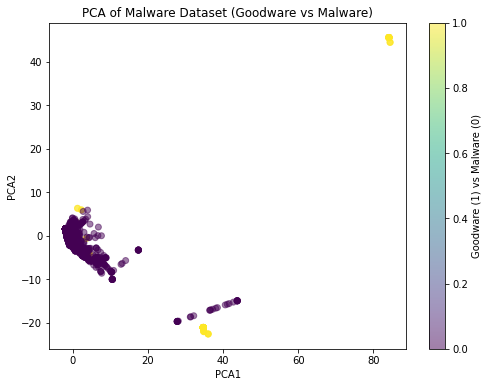

Explained variance by each component: [0.28392712 0.09635104]


In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(final_pca_df['PCA1'], final_pca_df['PCA2'], c=final_pca_df['Label'], cmap='viridis', alpha=0.5)
plt.title('PCA of Malware Dataset (Goodware vs Malware)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Goodware (1) vs Malware (0)')
plt.show()

# Check the explained variance to understand how much variance is captured by the components
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")

The PCA plot shows distinct clusters, suggesting that malware and goodware have some differences in their features. A few of the yellow goodware points are clearly separated from the more dense malware cluster, meaning PCA is capturing some distinguishing characteristics. There is, however, some overlap indicating that some of the goodware and malware samples have similar feature representations. 

The first two components explain 28.39% (PCA 1) and 9.63% (PCA 2) of the total variance. Most of the dataset's variance is therefore not captured in just these two dimensions, but it is a good initial exploration in determining important features. Below we implement more components for further separation. 

In [24]:
# Apply PCA with more components 

pca1 = PCA(n_components=5) 
X_pca1 = pca1.fit_transform(X_scaled)

In [25]:
# Convert PCA result to a dataframe for easy viewing
X_pca_df1 = pd.DataFrame(X_pca1, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

In [26]:
# Concatenate the PCA results with the target labels once again
final_pca_df = pd.concat([X_pca_df1, y_final], axis=1)

In [27]:
# Display the first few rows of the PCA-transformed data (n=5)
final_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,Label
0,-0.321941,-1.075000,2.616770,5.649348,4.922564,1
1,-1.109919,0.526185,-0.824018,0.135846,-0.455579,1
2,-1.194217,0.633761,-0.797332,-0.297562,0.950470,1
3,-0.911590,0.108954,0.151365,1.282177,-0.757183,1
4,-1.526129,1.478503,-3.144332,-2.108343,-0.048972,1


In [28]:
# Explained variance of each component
explained_variance = pca1.explained_variance_ratio_

# Print explained variance for each component
print("Explained Variance Ratio by Component:")
for i, var in enumerate(explained_variance):
    print(f"PCA {i+1}: {var:.4f}")

Explained Variance Ratio by Component:
PCA 1: 0.2839
PCA 2: 0.0964
PCA 3: 0.0698
PCA 4: 0.0467
PCA 5: 0.0376


In [29]:
# Create a DataFrame of feature contributions (loadings)
pca_loadings = pd.DataFrame(pca1.components_.T, 
                            columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'], 
                            index=X_final.columns)

# Sort by absolute contribution to PCA1
top_features = pca_loadings['PCA1'].abs().sort_values(ascending=False)

# Display the top 10 contributing features
print(top_features.head(10))


READ_SOCIAL_STREAM                0.136755
SUBSCRIBED_FEEDS_READ             0.136043
PERSISTENT_ACTIVITY               0.134891
ACCESS_LOCATION_EXTRA_COMMANDS    0.133934
WRITE_USER_DICTIONARY             0.132856
WRITE_PROFILE                     0.132346
READ_SYNC_STATS                   0.132342
REORDER_TASKS                     0.128696
READ_USER_DICTIONARY              0.128452
EXPAND_STATUS_BAR                 0.127376
Name: PCA1, dtype: float64


PCA1 explains the most variance and reveals that many features relate to reading user social data, system access, location commands, and user dictionary modifications. `READ_SOCIAL_STREAM` and `SUBSCRIBED_FEEDS_READ` have the highest weights in PCA1. Some other significant features include `PERSISTENT_ACTIVITY`, `ACCESS_LOCATION_EXTRA_COMMANDS`, and `WRITE_USER_DICTIONARY` which are indicative of apps that require extensive background activity or personalization features. Apps with high values in PCA1 are likely to request more instrusive or sensitive permissions. These features, therefore, make sense as strong predictors of malware/goodware classification. 

### 3. Outline and justify a strategy for splitting the dataset into training, validation, and test sets, considering any potential class imbalance and the dataset’s characteristics

After implemeting SMOTE, it is important to maintain the balance between model performance and ensuring that it is generalizable on unseen data. The inital split is a majority (70%) used for training, allowing the model to learn from a substantial portion of the data while incorporating artificial samples from SMOTE for the minority class. The remaining 30% of the dataset will be reserved for the test set. We implement a stratified split on the dataset where each class is equally represented in both training and test sets. One key issue is that SMOTE can artifically inflate model performance on the test set, distorting our model's generalizability. 